In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import yfinance as yahooFinance
from backtesting.test import SMA

from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.metrics import classification_report


C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
GetFacebookInformation = yahooFinance.Ticker("META")
df=pd.DataFrame(data=GetFacebookInformation.history(period="max"))
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0


In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
df["Actual_Returns"] = df["Close"].pct_change()

# Display sample data
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns
Date,,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.109861
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.089039
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.032258
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.032187


In [4]:
# Drop all NaN values from the DataFrame
df = df.dropna()

# Review the DataFrame
display(df.head())
display(df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns
Date,,,,,,,,
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.109861
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.089039
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.032258
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.032187
2012-05-25 00:00:00-04:00,32.900002,32.950001,31.110001,31.910000,37149800,0.0,0.0,-0.033909


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns
Date,,,,,,,,
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0,-0.014777
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0,-0.005406
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0,-0.002639
2023-12-07 00:00:00-05:00,317.769989,328.239990,317.769989,326.589996,15905100,0.0,0.0,0.028792
2023-12-08 00:00:00-05:00,323.089996,333.170013,323.000000,332.750000,14077500,0.0,0.0,0.018862


# Baseline Trading Algorithm

In [5]:
signals_df = df

In [6]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_14804\1728448615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
C:\Users\ctzsn\AppData\Local\Temp\ipykernel_14804\1728448615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow
Date,,,,,,,,,,
2012-10-10 00:00:00-04:00,19.930000,19.940001,19.450001,19.639999,39321800,0.0,0.0,-0.029165,20.2950,24.9907
2012-10-11 00:00:00-04:00,19.879999,19.959999,19.610001,19.750000,21817300,0.0,0.0,0.005601,20.0050,24.8479
2012-10-12 00:00:00-04:00,19.750000,19.799999,19.480000,19.520000,18809400,0.0,0.0,-0.011646,19.7850,24.7331
2012-10-15 00:00:00-04:00,19.680000,19.879999,19.490000,19.520000,20189700,0.0,0.0,0.000000,19.6075,24.6083
2012-10-16 00:00:00-04:00,19.680000,19.690001,19.299999,19.480000,21834700,0.0,0.0,-0.002049,19.5675,24.4728


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow
Date,,,,,,,,,,
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0,-0.014777,326.047501,309.8601
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0,-0.005406,322.570000,309.9543
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0,-0.002639,320.145004,310.0226
2023-12-07 00:00:00-05:00,317.769989,328.239990,317.769989,326.589996,15905100,0.0,0.0,0.028792,320.587502,310.1680
2023-12-08 00:00:00-05:00,323.089996,333.170013,323.000000,332.750000,14077500,0.0,0.0,0.018862,323.770004,310.3354


In [7]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual_Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual_Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_14804\2639677194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Signal'] = 0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,,,,,,,
2012-10-10 00:00:00-04:00,19.930000,19.940001,19.450001,19.639999,39321800,0.0,0.0,-0.029165,20.2950,24.9907,-1.0
2012-10-11 00:00:00-04:00,19.879999,19.959999,19.610001,19.750000,21817300,0.0,0.0,0.005601,20.0050,24.8479,1.0
2012-10-12 00:00:00-04:00,19.750000,19.799999,19.480000,19.520000,18809400,0.0,0.0,-0.011646,19.7850,24.7331,-1.0
2012-10-15 00:00:00-04:00,19.680000,19.879999,19.490000,19.520000,20189700,0.0,0.0,0.000000,19.6075,24.6083,1.0
2012-10-16 00:00:00-04:00,19.680000,19.690001,19.299999,19.480000,21834700,0.0,0.0,-0.002049,19.5675,24.4728,-1.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,,,,,,,
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0,-0.014777,326.047501,309.8601,-1.0
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0,-0.005406,322.570000,309.9543,-1.0
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0,-0.002639,320.145004,310.0226,-1.0
2023-12-07 00:00:00-05:00,317.769989,328.239990,317.769989,326.589996,15905100,0.0,0.0,0.028792,320.587502,310.1680,1.0
2023-12-08 00:00:00-05:00,323.089996,333.170013,323.000000,332.750000,14077500,0.0,0.0,0.018862,323.770004,310.3354,1.0


In [8]:
signals_df['Signal'].value_counts()

 1.0    1485
-1.0    1324
Name: Signal, dtype: int64

In [9]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy_Returns'] = signals_df['Actual_Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_14804\879764679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Strategy_Returns'] = signals_df['Actual_Returns'] * signals_df['Signal'].shift()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow,Signal,Strategy_Returns
Date,,,,,,,,,,,,
2012-10-10 00:00:00-04:00,19.930000,19.940001,19.450001,19.639999,39321800,0.0,0.0,-0.029165,20.2950,24.9907,-1.0,NaN
2012-10-11 00:00:00-04:00,19.879999,19.959999,19.610001,19.750000,21817300,0.0,0.0,0.005601,20.0050,24.8479,1.0,-0.005601
2012-10-12 00:00:00-04:00,19.750000,19.799999,19.480000,19.520000,18809400,0.0,0.0,-0.011646,19.7850,24.7331,-1.0,-0.011646
2012-10-15 00:00:00-04:00,19.680000,19.879999,19.490000,19.520000,20189700,0.0,0.0,0.000000,19.6075,24.6083,1.0,-0.000000
2012-10-16 00:00:00-04:00,19.680000,19.690001,19.299999,19.480000,21834700,0.0,0.0,-0.002049,19.5675,24.4728,-1.0,-0.002049


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual_Returns,SMA_Fast,SMA_Slow,Signal,Strategy_Returns
Date,,,,,,,,,,,,
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0,-0.014777,326.047501,309.8601,-1.0,0.014777
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0,-0.005406,322.570000,309.9543,-1.0,0.005406
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0,-0.002639,320.145004,310.0226,-1.0,0.002639
2023-12-07 00:00:00-05:00,317.769989,328.239990,317.769989,326.589996,15905100,0.0,0.0,0.028792,320.587502,310.1680,1.0,-0.028792
2023-12-08 00:00:00-05:00,323.089996,333.170013,323.000000,332.750000,14077500,0.0,0.0,0.018862,323.770004,310.3354,1.0,0.018862


<Axes: xlabel='Date'>

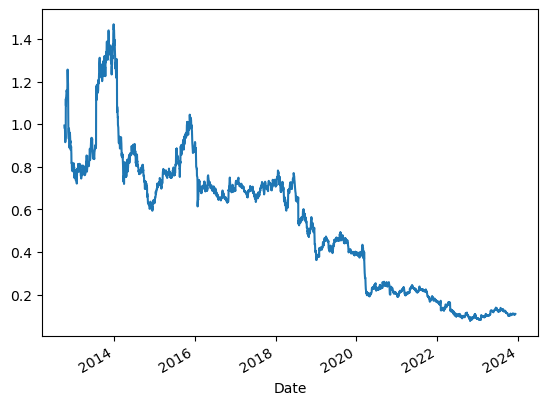

In [10]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy_Returns']).cumprod().plot()

In [11]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
Date,,
2012-10-11 00:00:00-04:00,20.2950,24.9907
2012-10-12 00:00:00-04:00,20.0050,24.8479
2012-10-15 00:00:00-04:00,19.7850,24.7331
2012-10-16 00:00:00-04:00,19.6075,24.6083
2012-10-17 00:00:00-04:00,19.5675,24.4728


In [12]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    1485
-1.0    1324
Name: Signal, dtype: int64

In [13]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2012-10-11 00:00:00-04:00


In [14]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2013-04-11 00:00:00-04:00


In [15]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2012-10-11 00:00:00-04:00,20.2950,24.9907
2012-10-12 00:00:00-04:00,20.0050,24.8479
2012-10-15 00:00:00-04:00,19.7850,24.7331
2012-10-16 00:00:00-04:00,19.6075,24.6083
2012-10-17 00:00:00-04:00,19.5675,24.4728


In [16]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2012-10-11 00:00:00-04:00,20.2950,24.9907
2012-10-12 00:00:00-04:00,20.0050,24.8479
2012-10-15 00:00:00-04:00,19.7850,24.7331
2012-10-16 00:00:00-04:00,19.6075,24.6083
2012-10-17 00:00:00-04:00,19.5675,24.4728


In [17]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [19]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.47      0.04      0.07      1260
         1.0       0.53      0.96      0.68      1425

    accuracy                           0.53      2685
   macro avg       0.50      0.50      0.38      2685
weighted avg       0.50      0.53      0.39      2685



In [20]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual_Returns'] = signals_df['Actual_Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual_Returns,Strategy_Returns
Date,,,
2013-04-12 00:00:00-04:00,-1.0,-0.022127,0.022127
2013-04-15 00:00:00-04:00,-1.0,-0.032117,0.032117
2013-04-16 00:00:00-04:00,-1.0,0.015083,-0.015083
2013-04-17 00:00:00-04:00,-1.0,-0.010773,0.010773
2013-04-18 00:00:00-04:00,-1.0,-0.035298,0.035298


,Predicted,Actual_Returns,Strategy_Returns
Date,,,
2023-12-04 00:00:00-05:00,1.0,-0.014777,-0.014777
2023-12-05 00:00:00-05:00,1.0,-0.005406,-0.005406
2023-12-06 00:00:00-05:00,1.0,-0.002639,-0.002639
2023-12-07 00:00:00-05:00,1.0,0.028792,0.028792
2023-12-08 00:00:00-05:00,1.0,0.018862,0.018862


<Axes: xlabel='Date'>

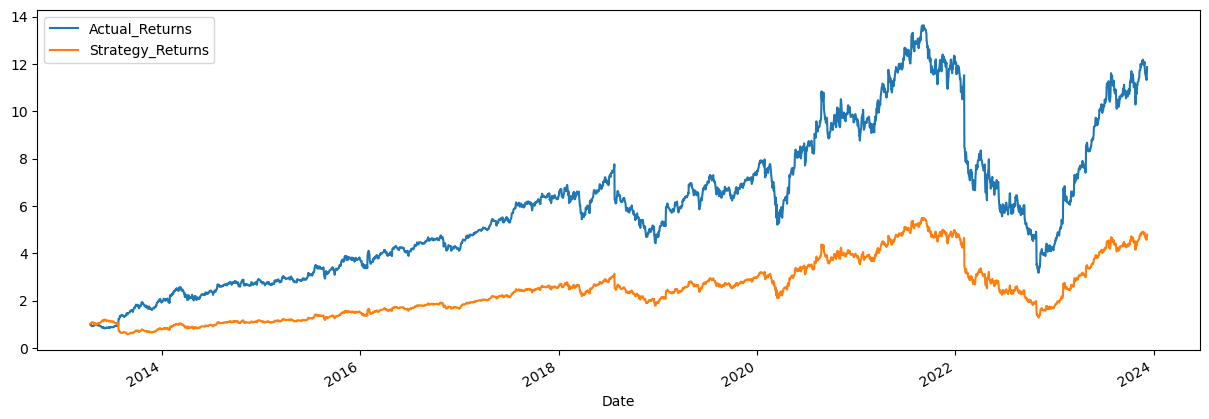

In [21]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual_Returns', 'Strategy_Returns']]).cumprod().plot(figsize = (15,5))

# LogisticRegression

In [22]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

In [23]:
# Initiate the model instance
logistic_regression_model = LogisticRegression()

In [24]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [25]:
# Use a classification report to evaluate the model using the predictions and testing data
signal_predictions = classification_report(y_test, pred)

# Print the classification report
print(signal_predictions)

              precision    recall  f1-score   support

        -1.0       0.47      1.00      0.64      1260
         1.0       0.00      0.00      0.00      1425

    accuracy                           0.47      2685
   macro avg       0.23      0.50      0.32      2685
weighted avg       0.22      0.47      0.30      2685



C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
second_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
second_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
second_predictions_df["Actual_Returns"] = signals_df["Actual_Returns"]

# Add the strategy returns to the DataFrame
second_predictions_df['Strategy_Returns'] = second_predictions_df["Actual_Returns"] * pred

# Review the DataFrame
second_predictions_df

,Predicted,Actual_Returns,Strategy_Returns
Date,,,
2013-04-12 00:00:00-04:00,-1.0,-0.022127,0.022127
2013-04-15 00:00:00-04:00,-1.0,-0.032117,0.032117
2013-04-16 00:00:00-04:00,-1.0,0.015083,-0.015083
2013-04-17 00:00:00-04:00,-1.0,-0.010773,0.010773
2013-04-18 00:00:00-04:00,-1.0,-0.035298,0.035298
...,...,...,...
2023-12-04 00:00:00-05:00,-1.0,-0.014777,0.014777
2023-12-05 00:00:00-05:00,-1.0,-0.005406,0.005406
2023-12-06 00:00:00-05:00,-1.0,-0.002639,0.002639


<Axes: xlabel='Date'>

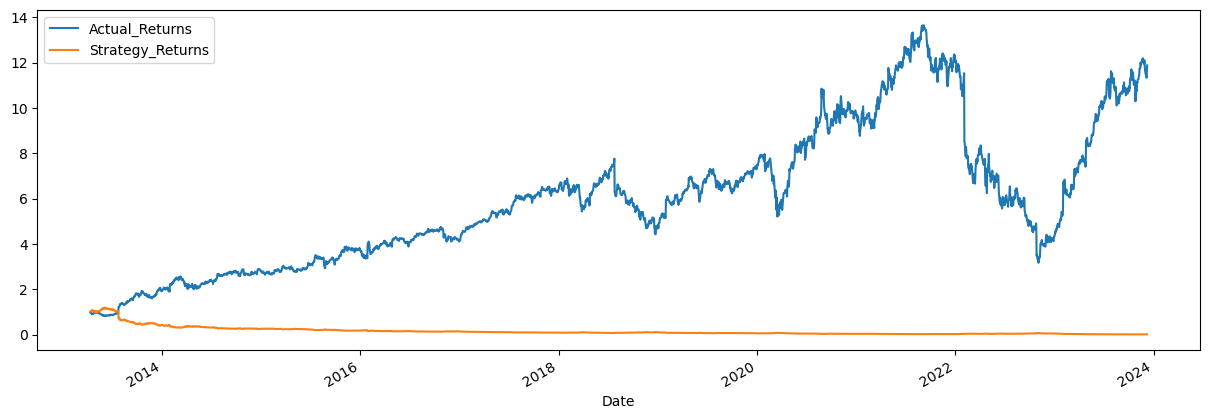

In [27]:
# Plot the actual returns versus the strategy returns
(1 + second_predictions_df[["Actual_Returns", "Strategy_Returns"]]).cumprod().plot(figsize = (15,5))

# Multi-layer Perceptron (MLP) Algorithm

In [29]:
# Import a new classifier from SKLearn

# multi-layer perceptron (MLP) algorithm
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
clf = MLPClassifier(solver='sgd', 
                    alpha=1e-5,
                    # max_iter=1000,
                    hidden_layer_sizes=(8, 4),
                    random_state=42
                    )

In [30]:
# Fit the model using the training data
MLP_model = clf.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
MLP_pred = MLP_model.predict(X_test_scaled)

# Review the model's predicted values
MLP_pred 

C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([-1., -1., -1., ...,  1.,  1.,  1.])

In [31]:
# Use a classification report to evaluate the model using the predictions and testing data
MLP_testing_report = classification_report(y_test, MLP_pred)

# Print the classification report
print(MLP_testing_report)

              precision    recall  f1-score   support

        -1.0       0.46      0.03      0.06      1260
         1.0       0.53      0.97      0.69      1425

    accuracy                           0.53      2685
   macro avg       0.50      0.50      0.37      2685
weighted avg       0.50      0.53      0.39      2685



In [32]:
# Create a predictions DataFrame
MLP_predictions_df = pd.DataFrame(index = X_test.index)

# Add the model predictions to the DataFrame
MLP_predictions_df['Predicted'] = MLP_pred

# Add the actual returns to the DataFrame
MLP_predictions_df['Actual_Returns'] = signals_df['Actual_Returns']

# Add the strategy returns to the DataFrame
MLP_predictions_df['Strategy_Returns'] = MLP_predictions_df['Actual_Returns'] * MLP_predictions_df['Predicted']

# Review the DataFrame
display(MLP_predictions_df.head())
display(MLP_predictions_df.tail())

,Predicted,Actual_Returns,Strategy_Returns
Date,,,
2013-04-12 00:00:00-04:00,-1.0,-0.022127,0.022127
2013-04-15 00:00:00-04:00,-1.0,-0.032117,0.032117
2013-04-16 00:00:00-04:00,-1.0,0.015083,-0.015083
2013-04-17 00:00:00-04:00,-1.0,-0.010773,0.010773
2013-04-18 00:00:00-04:00,-1.0,-0.035298,0.035298


,Predicted,Actual_Returns,Strategy_Returns
Date,,,
2023-12-04 00:00:00-05:00,1.0,-0.014777,-0.014777
2023-12-05 00:00:00-05:00,1.0,-0.005406,-0.005406
2023-12-06 00:00:00-05:00,1.0,-0.002639,-0.002639
2023-12-07 00:00:00-05:00,1.0,0.028792,0.028792
2023-12-08 00:00:00-05:00,1.0,0.018862,0.018862


<Axes: xlabel='Date'>

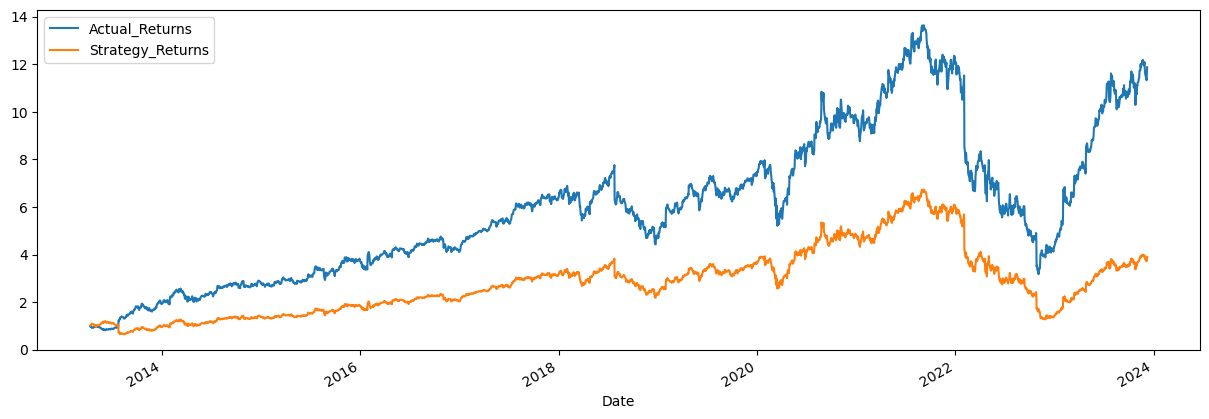

In [33]:
# Plot the actual returns versus the strategy returns
(1 + MLP_predictions_df[['Actual_Returns', 'Strategy_Returns']]).cumprod().plot(figsize = (15,5))